In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
# A. Загрузка и первичный обзор
df = pd.read_csv('/content/Winter_Fashion_Trends_Dataset.csv')
print('Первые 5 строк:')
print(df.head())
print('Последние 5 строк:')
print(df.tail())

Первые 5 строк:
   ID       Brand Category  Color   Material       Style  Gender       Season  \
0   1      Adidas   Gloves  Brown  Polyester  Streetwear   Women  Winter 2025   
1   2       Gucci   Gloves    Red    Leather      Sporty     Men  Winter 2023   
2   3         H&M     Coat  Brown     Fleece  Streetwear  Unisex  Winter 2025   
3   4  North Face     Coat   Blue   Cashmere      Formal     Men  Winter 2024   
4   5       Mango  Thermal   Blue   Cashmere      Formal  Unisex  Winter 2025   

   Price(USD)  Popularity_Score  Customer_Rating Trend_Status  
0      244.06               6.0              4.9     Trending  
1      366.73               8.8              3.3     Trending  
2      741.55               4.8              3.5     Trending  
3      116.09               7.5              3.1     Outdated  
4      193.16               7.8              4.3     Outdated  
Последние 5 строк:
      ID   Brand Category  Color   Material   Style  Gender       Season  \
145  146   Mango  

In [4]:
print('Информация о данных:')
print(df.info())
print(f'Размер датасета: {df.shape}')
print(f'Количество строк: {df.shape[0]}')
print(f'Количество столбцов: {df.shape[1]}')

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                150 non-null    int64  
 1   Brand             150 non-null    object 
 2   Category          150 non-null    object 
 3   Color             150 non-null    object 
 4   Material          150 non-null    object 
 5   Style             150 non-null    object 
 6   Gender            150 non-null    object 
 7   Season            150 non-null    object 
 8   Price(USD)        150 non-null    float64
 9   Popularity_Score  150 non-null    float64
 10  Customer_Rating   150 non-null    float64
 11  Trend_Status      150 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 14.2+ KB
None
Размер датасета: (150, 12)
Количество строк: 150
Количество столбцов: 12


In [5]:
# Проверка типов данных
print('Типы данных:')
print(df.dtypes)

Типы данных:
ID                    int64
Brand                object
Category             object
Color                object
Material             object
Style                object
Gender               object
Season               object
Price(USD)          float64
Popularity_Score    float64
Customer_Rating     float64
Trend_Status         object
dtype: object


In [57]:
# B. Обработка данных
# 1. Пропущенные значения
print('Анализ пропущенных значений')
print('='*60)
missing_values = df.isnull().sum()
total_missing = missing_values.sum()
print('Количество пропусков по столбцам:')
for col, count in missing_values.items():
  if count > 0:
    print(f'{col}: {count} пропусков ({count/len(df)*100:.1f}%)')
print(f'Всего пропусков в датасете: {total_missing}')

Анализ пропущенных значений
Количество пропусков по столбцам:
Всего пропусков в датасете: 0


In [59]:
from pandas.core.arrays import categorical
# Определяем типы колонок для стратегии заполнения
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Числовые колонки: {numeric_cols}')
print(f'Категорические колонки: {categorical_cols}')

Числовые колонки: ['ID', 'Price(USD)', 'Popularity_Score', 'Customer_Rating']
Категорические колонки: ['Brand', 'Category', 'Color', 'Material', 'Style', 'Gender', 'Season', 'Trend_Status']


In [22]:
# Стратегия заполнения пропусков
if total_missing > 0:
  print('Заполнение пропущенных значений......')

In [25]:
# Для числовых колонок используем медиану
for col in numeric_cols:
  if df[col].isnull().sum() > 0:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f'{col}: заполнено медианой = {median_val:.2f}')

In [35]:
# Для категориальных колонок используем моду
for col in categorical_cols:
  if df[col].isnull().sum() > 0:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)
    print(f"{col}: заполнено модой = '{mode_val}'")
    print("Все пропуски успешно обработаны!")
else:
    print("Пропущенных значений не обнаружено.")

Пропущенных значений не обнаружено.


In [60]:
# 2. Дубликаты
print('2. Анализ дубликатов')
print('='*60)
duplicate_count = df.duplicated().sum()
print(f'Количество дублирующихся строк: {duplicate_count}')

2. Анализ дубликатов
Количество дублирующихся строк: 0


In [38]:
if duplicate_count > 0:
  original_size = len(df)
  df = df.drop_duplicates()
  new_size = len(df)
  print(f'Удалено {duplicate_count} дубликатов')
  print(f'Размер датасета до удаления: {original_size}')
  print(f'Размер датасета после удаления: {new_size}')
else:
  print('Дубликатов не обнаружно')

Дубликатов не обнаружно


In [39]:
# 3. Выбросы
print('3. Анализ выбросов(Z-SCORE)')
print('='*60)

3. Анализ выбросов(Z-SCORE)
------------------------------------------------------------


In [40]:
from scipy import stats
# Использую z-score для обнаружения выбросов
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers_mask = (z_scores > 3).any(axis=1)
outliers_count = outliers_mask.sum()
print(f'Количество строк с выбросами (z-score > 3): {outliers_count}')
print(f'Процент выбросов: {outliers_count/len(df)*100:.2f}%')

Количество строк с выбросами (z-score > 3): 0
Процент выбросов: 0.00%


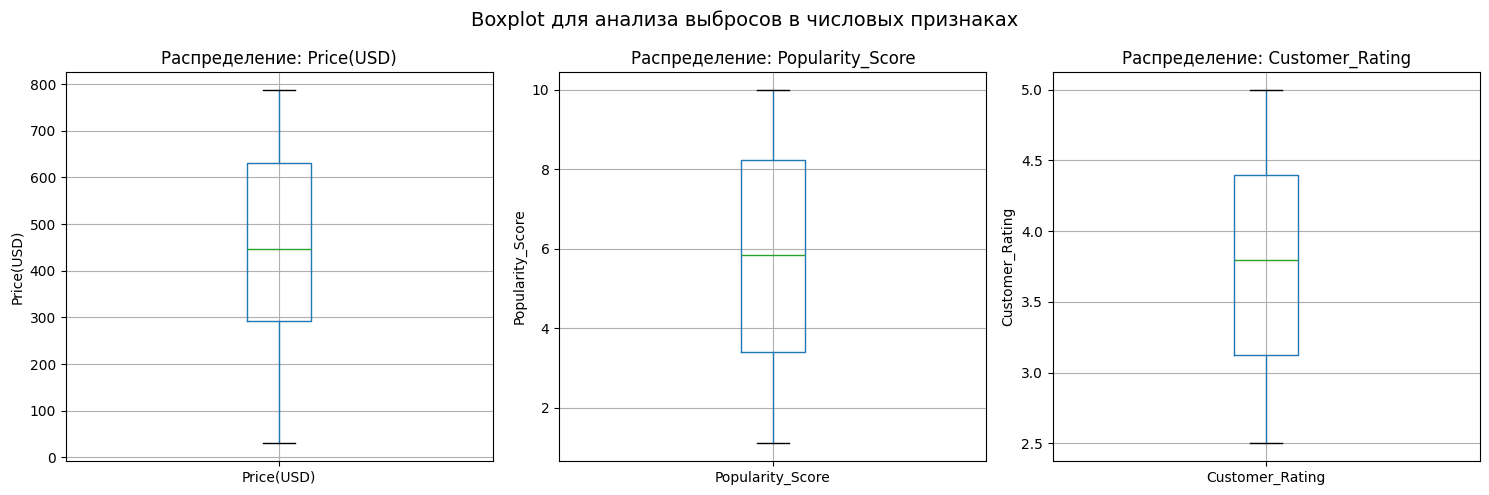

In [42]:
# Визуализация выбросов с помощью boxplot
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
boxplot_data = ['Price(USD)', 'Popularity_Score', 'Customer_Rating']
for i, col in enumerate(boxplot_data):
  df.boxplot(column=col, ax=axes[i])
  axes[i].set_title(f'Распределение: {col}')
  axes[i].set_ylabel(col)
plt.suptitle('Boxplot для анализа выбросов в числовых признаках', fontsize=14)
plt.tight_layout()
plt.show()

In [62]:
# 4. Статистики данных
print('4. Статический аналих данных')
print('='*60)

print('A) Описательная статистика (describe):')
print(df[numeric_cols].describe())
print('' + '='*60)

print('B) Подсчёт уникальных значений:')
for col in categorical_cols:
    if col != 'ID':
        unique_count = df[col].nunique()
        print(f'{col}: {unique_count} уникальных значений')
print('' + '='*60)

print('C) Частота значений для категориальных признаков:')
for col in ['Trend_Status', 'Category', 'Gender']:
    print(f'Распределение {col}:')
    print(df[col].value_counts().head())
print('' + '='*60)

print('D) Корреляционный анализ (corr):')
correlation_matrix = df[['Price(USD)', 'Popularity_Score', 'Customer_Rating']].corr()
print(correlation_matrix)

4. Статический аналих данных
A) Описательная статистика (describe):
               ID  Price(USD)  Popularity_Score  Customer_Rating
count  150.000000  150.000000        150.000000       150.000000
mean    75.500000  443.105933          5.763333         3.802667
std     43.445368  211.630074          2.655763         0.719428
min      1.000000   30.070000          1.100000         2.500000
25%     38.250000  292.807500          3.400000         3.125000
50%     75.500000  445.820000          5.850000         3.800000
75%    112.750000  631.537500          8.225000         4.400000
max    150.000000  788.030000         10.000000         5.000000
B) Подсчёт уникальных значений:
Brand: 10 уникальных значений
Category: 10 уникальных значений
Color: 10 уникальных значений
Material: 7 уникальных значений
Style: 5 уникальных значений
Gender: 3 уникальных значений
Season: 3 уникальных значений
Trend_Status: 4 уникальных значений
C) Частота значений для категориальных признаков:
Распределение T

C. Визуализация данных (5+ графиков)
1. ГИСТОГРАММА: Распределение цен


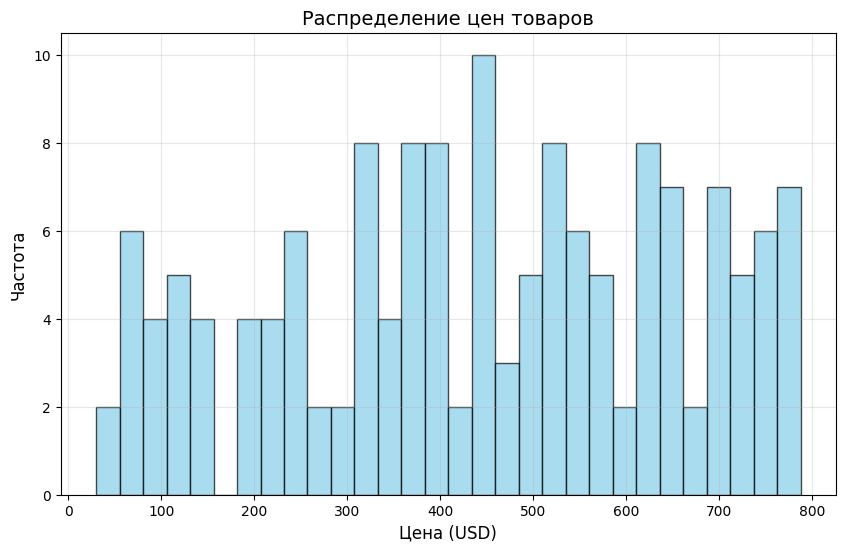

In [44]:
# C. Визуализация данных (минимум 5 графиков)
print('' + '='*60)
print('C. Визуализация данных (5+ графиков)')
print('='*60)

# 1. Гистограмма распределения цен
print('1. ГИСТОГРАММА: Распределение цен')
plt.figure(figsize=(10, 6))
df['Price(USD)'].hist(bins=30, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Распределение цен товаров', fontsize=14)
plt.xlabel('Цена (USD)', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

2. ЛИНЕЙНЫЙ ГРАФИК: Средняя цена по сезонам


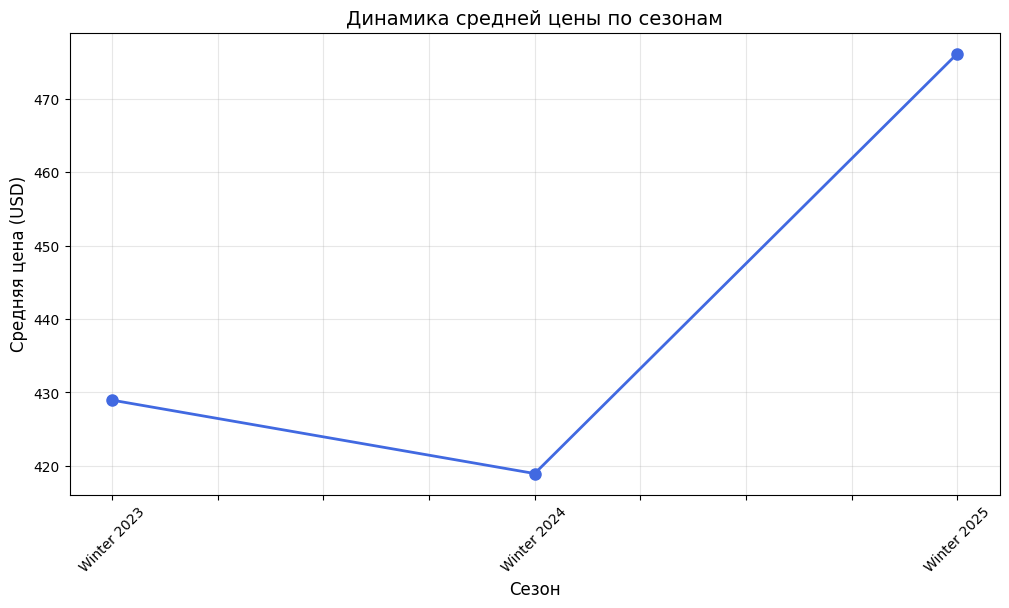

In [45]:
# 2. Линейный график: средняя цена по сезонам
print('2. ЛИНЕЙНЫЙ ГРАФИК: Средняя цена по сезонам')
plt.figure(figsize=(12, 6))
season_avg_price = df.groupby('Season')['Price(USD)'].mean().sort_index()
season_avg_price.plot(kind='line', marker='o', linewidth=2, markersize=8, color='royalblue')
plt.title('Динамика средней цены по сезонам', fontsize=14)
plt.xlabel('Сезон', fontsize=12)
plt.ylabel('Средняя цена (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

3. СТОЛБЧАТАЯ ДИАГРАММА: Топ-10 брендов по средней цене


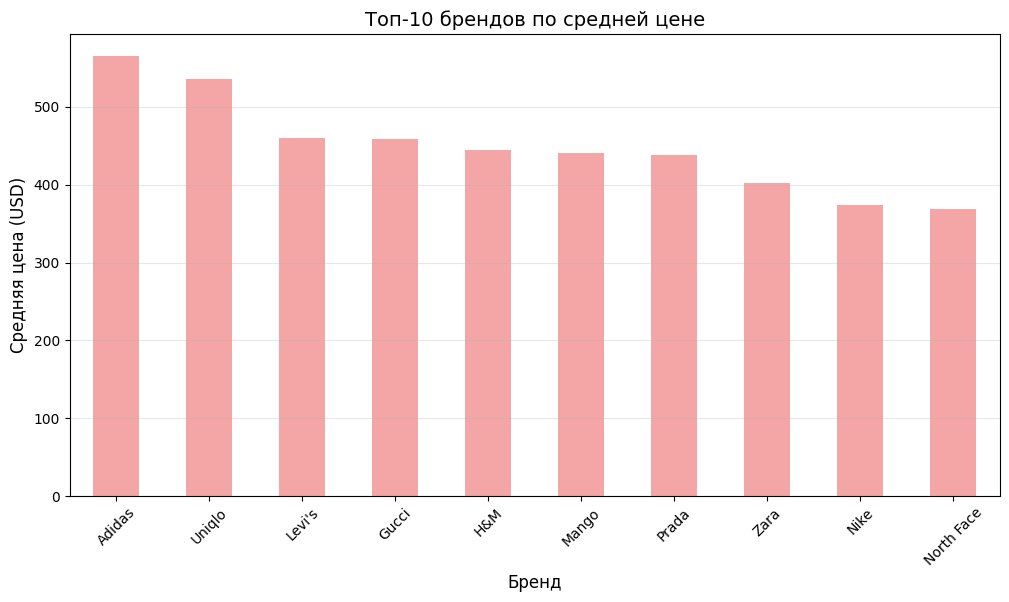

In [46]:
# 3. Столбчатая диаграмма: средняя цена по брендам (топ-10)
print('3. СТОЛБЧАТАЯ ДИАГРАММА: Топ-10 брендов по средней цене')
plt.figure(figsize=(12, 6))
brand_avg_price = df.groupby('Brand')['Price(USD)'].mean().sort_values(ascending=False).head(10)
brand_avg_price.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Топ-10 брендов по средней цене', fontsize=14)
plt.xlabel('Бренд', fontsize=12)
plt.ylabel('Средняя цена (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

4. BOXPLOT: Распределение цен по категориям товаров


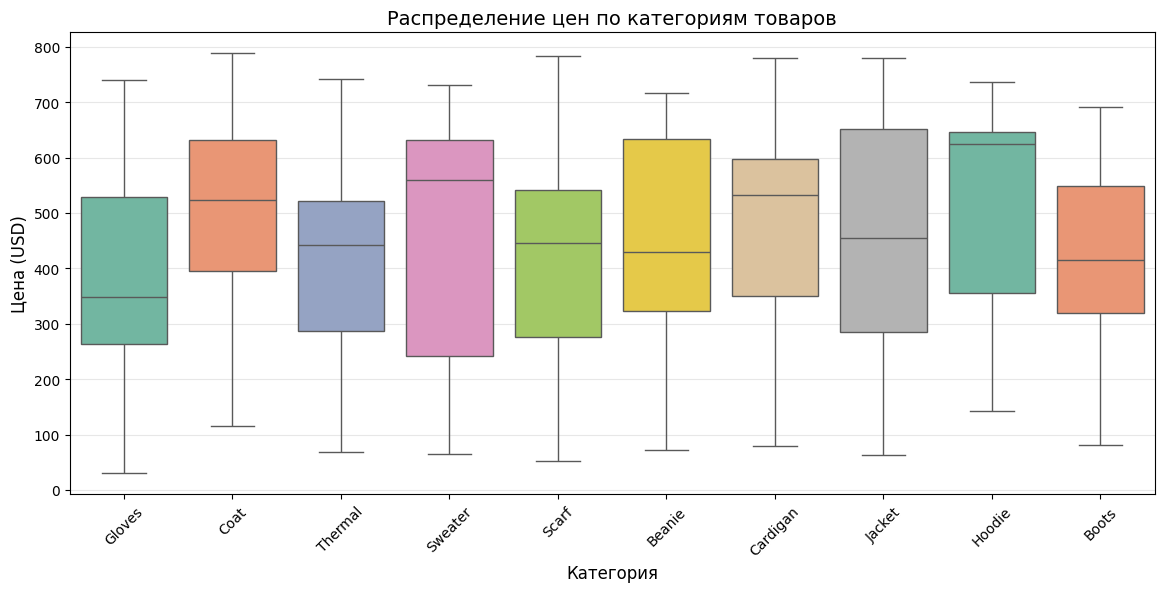

In [47]:
# 4. Boxplot: распределение цен по категориям
print('4. BOXPLOT: Распределение цен по категориям товаров')
plt.figure(figsize=(14, 6))
sns.boxplot(x='Category', y='Price(USD)', data=df, palette='Set2')
plt.title('Распределение цен по категориям товаров', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Цена (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.show()


5. HEATMAP: Корреляция между числовыми признаками


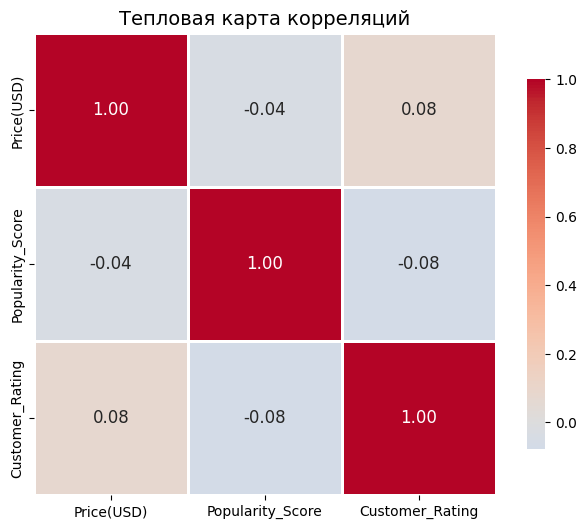

In [48]:
# 5. Heatmap корреляций
print('5. HEATMAP: Корреляция между числовыми признаками')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f', annot_kws={'size': 12})
plt.title('Тепловая карта корреляций', fontsize=14)
plt.show()

6. ДОПОЛНИТЕЛЬНО: Распределение товаров по статусам трендов


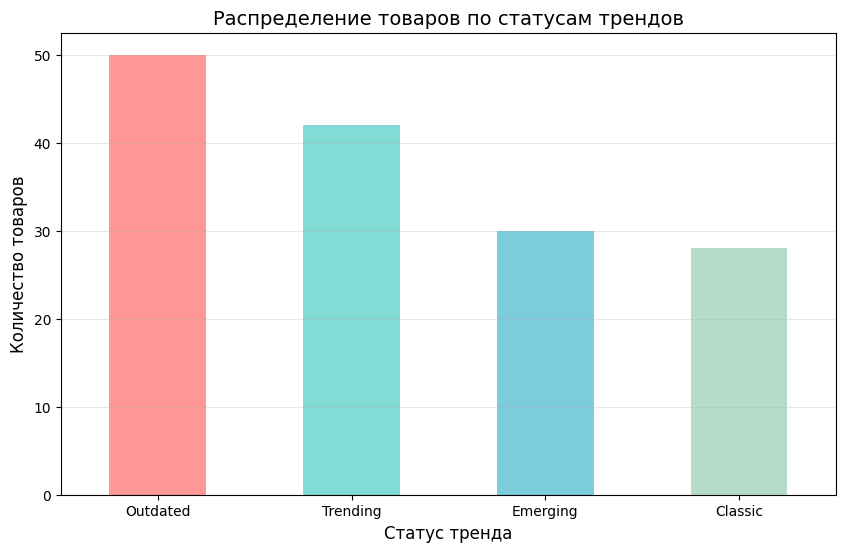

In [49]:
# 6. Дополнительная визуализация: распределение по статусам трендов
print('6. ДОПОЛНИТЕЛЬНО: Распределение товаров по статусам трендов')
plt.figure(figsize=(10, 6))
trend_counts = df['Trend_Status'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
trend_counts.plot(kind='bar', color=colors, alpha=0.7)
plt.title('Распределение товаров по статусам трендов', fontsize=14)
plt.xlabel('Статус тренда', fontsize=12)
plt.ylabel('Количество товаров', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

In [51]:
# D. Группировки и агрегации (минимум 3 вида)
print('' + '='*60)
print('D. Группировки и агрегации')
print('='*60)

print('1. ГРУППИРОВКА 1: Средние показатели по брендам')
brand_analysis = df.groupby('Brand').agg({
    'Price(USD)': ['mean', 'median', 'count'],
    'Popularity_Score': 'mean',
    'Customer_Rating': 'mean'
}).round(2)
print(brand_analysis.head(10))
print('' + '-'*60)

D. Группировки и агрегации
1. ГРУППИРОВКА 1: Средние показатели по брендам
           Price(USD)               Popularity_Score Customer_Rating
                 mean  median count             mean            mean
Brand                                                               
Adidas         565.40  555.62    10             6.27            3.96
Gucci          458.99  456.76    14             5.64            3.66
H&M            443.94  407.91    15             5.25            4.07
Levi's         459.95  564.06     8             5.82            3.45
Mango          440.22  468.58    25             6.53            3.74
Nike           373.65  367.56    13             6.46            3.54
North Face     368.17  358.65    20             5.86            3.73
Prada          437.88  424.72    16             4.69            3.96
Uniqlo         536.19  630.86    16             4.61            4.07
Zara           402.76  399.37    13             6.48            3.72
----------------------------

In [52]:
print('2. ГРУППИРОВКА 2: Статистика по категориям и полу')
category_gender_stats = df.groupby(['Category', 'Gender']).agg({
    'Price(USD)': 'mean',
    'Popularity_Score': 'mean',
    'Customer_Rating': 'mean',
    'ID': 'count'
}).rename(columns={'ID': 'Количество'}).round(2)
print(category_gender_stats.head(15))
print('' + '-'*60)

2. ГРУППИРОВКА 2: Статистика по категориям и полу
                 Price(USD)  Popularity_Score  Customer_Rating  Количество
Category Gender                                                           
Beanie   Men         404.91              7.10             3.77           3
         Unisex      429.64              3.40             2.80           2
         Women       455.32              6.21             4.16           7
Boots    Men         352.57              6.85             3.58           4
         Unisex      437.69              7.30             3.04           5
         Women       569.28              6.90             4.00           2
Cardigan Men         503.14              3.38             3.22           4
         Unisex      472.44              7.57             3.63           3
         Women       452.86              4.55             4.18           4
Coat     Men         499.49              7.13             3.43           6
         Unisex      454.23              6.55     

In [53]:
print('3. ГРУППИРОВКА 3: Анализ по статусам трендов')
trend_analysis = df.groupby('Trend_Status').agg({
    'Price(USD)': ['mean', 'min', 'max', 'count'],
    'Popularity_Score': 'mean',
    'Customer_Rating': 'mean'
}).round(2)
print(trend_analysis)
print('' + '-'*60)

3. ГРУППИРОВКА 3: Анализ по статусам трендов
             Price(USD)                      Popularity_Score Customer_Rating
                   mean    min     max count             mean            mean
Trend_Status                                                                 
Classic          383.27  52.28  735.62    28             5.04            3.69
Emerging         449.76  69.14  788.03    30             5.91            3.68
Outdated         442.02  30.07  782.43    50             6.16            3.84
Trending         479.54  63.68  779.50    42             5.66            3.93
------------------------------------------------------------


In [54]:
print('4. СВОДНАЯ ТАБЛИЦА (PIVOT_TABLE): Цены по брендам и статусам трендов')
pivot_result = pd.pivot_table(df,
    values='Price(USD)',
    index='Brand',
    columns='Trend_Status',
    aggfunc=['mean', 'count'],
    fill_value=0
).round(2)
print(pivot_result.head(8))

4. СВОДНАЯ ТАБЛИЦА (PIVOT_TABLE): Цены по брендам и статусам трендов
                mean                              count                    \
Trend_Status Classic Emerging Outdated Trending Classic Emerging Outdated   
Brand                                                                       
Adidas        214.48   616.20   641.11   577.17       1        3        2   
Gucci         545.67   572.90   379.59   455.18       3        2        6   
H&M             0.00   578.88   324.17   467.18       0        2        4   
Levi's        331.75     0.00   491.56   604.85       3        0        3   
Mango         336.27   544.00   430.62   579.59       7        4       11   
Nike          277.99   260.02   520.92   359.44       2        3        4   
North Face    447.28   383.01   293.91   341.23       5        7        6   
Prada         338.18   459.29   454.57   438.92       2        6        4   

                       
Trend_Status Trending  
Brand                  
Adidas     

In [55]:
# Итоговый вывод и сохранение
print('' + '='*60)
print('Итоги анализа')
print('='*60)

print('Ключевые выводы:')
print('1. Объем данных: {} строк, {} столбцов'.format(df.shape[0], df.shape[1]))
print('2. Обработано пропусков: {}'.format(total_missing))
print('3. Удалено дубликатов: {}'.format(duplicate_count))
print('4. Обнаружено выбросов: {} ({:.1f}%)'.format(outliers_count, outliers_count/len(df)*100))
print('5. Средняя цена товаров: ${:.2f}'.format(df['Price(USD)'].mean()))
print('6. Средний рейтинг покупателей: {:.2f}/5'.format(df['Customer_Rating'].mean()))
print('7. Средняя популярность: {:.2f}/10'.format(df['Popularity_Score'].mean()))

Итоги анализа
Ключевые выводы:
1. Объем данных: 150 строк, 12 столбцов
2. Обработано пропусков: 0
3. Удалено дубликатов: 0
4. Обнаружено выбросов: 0 (0.0%)
5. Средняя цена товаров: $443.11
6. Средний рейтинг покупателей: 3.80/5
7. Средняя популярность: 5.76/10


In [56]:
# Сохранение обработанных данных
output_file = 'Winter_Fashion_Processed.csv'
df.to_csv(output_file, index=False)
print(f'Обработанные данные сохранены в файл: {output_file}')
print(f' Файл содержит: {df.shape[0]} строк и {df.shape[1]} столбцов')

print('' + '='*60)
print('Анализ успешно завершён, поздравляю!')
print('='*60)

Обработанные данные сохранены в файл: Winter_Fashion_Processed.csv
 Файл содержит: 150 строк и 12 столбцов
Анализ успешно завершён, поздравляю!
